# Siparişler

✏️ **Alıştırma**

Bugün **siparişleri** ve bunlara ait **değerlendirme puanını (review score)** inceleyeceğiz.

👉 Amacımız aşağıdaki özelliklere sahip bir DataFrame oluşturmaktır:


| özellik_adı  	| tip  	| açıklama  	|
|:---	|:---:	|:---	|
| `order_id` 	| str 	| siparişin kimliği (id) 	|
| `wait_time` 	| float 	| `order_purchase_timestamp` ile `order_delivered_customer_date` arasındaki gün sayısı 	|
| `expected_wait_time` 	| float 	| `order_purchase_timestamp` ile `estimated_delivery_date` arasındaki beklenen gün sayısı 	|
| `delay_vs_expected` 	| float 	| gerçek `order_delivered_customer_date` tahmini teslim tarihinden sonra ise iki tarih arasındaki gün sayısını döndürür, aksi halde 0 döndürür 	|
| `order_status` 	| str 	| siparişin durumu 	|
| `dim_is_five_star` 	| int 	| sipariş beş yıldız aldıysa 1, aksi halde 0 	|
| `dim_is_one_star` 	| int 	| sipariş bir yıldız aldıysa 1, aksi halde 0 	|
| `review_score` 	| int 	| 1 ile 5 arasında 	|
| `number_of_items` 	| int 	| siparişin içerdiği toplam ürün sayısı 	|
| `number_of_sellers` 	| int 	| siparişte yer alan satıcı sayısı 	|
| `price` 	| float 	| müşterinin ödediği toplam sipariş fiyatı 	|
| `freight_value` 	| float 	| müşterinin ödediği kargo ücreti 	|
| `distance_customer_seller` 	| float 	| müşteri ile satıcı arasındaki mesafe (km, isteğe bağlı) 	|  

⚠️ Ayrıca "teslim edilmemiş" siparişleri filtrelemeliyiz; aksi belirtilmedikçe bunları dahil etmeyin, çünkü potansiyel gecikmeleri hesaplayamayız.

❓ **Senin görevin**: 

- Her bir özelliği `olist/order.py` içindeki `Order` sınıfında ayrı bir metod olarak uygulayın
- Ardından, eksiksiz DataFrame'i **`NaN` içermeyecek şekilde** döndüren `get_training_data()` metodunu oluşturun.

💡 Önerilen yöntem:
- Önce aşağıdaki notebook'u kullanarak kodunuzu adım adım yazıp test edin
- Kod mantığınızdan emin olduktan sonra kodu `order.py` dosyasına kopyalayın
- Şimdilik veri işleme mantığına odaklanın; veriyi görselleştirmeyi sonraki alıştırmalarda yapacağız

🔥 Notebook için en iyi uygulamalar (okumanız zorunludur) 👇

<details>
    <summary>▸ <i>tıklayın</i></summary>

Bundan sonra keşif amaçlı notebook'lar oldukça uzun olabilir; bu nedenle aşağıdaki ilkeleri takip etmenizi şiddetle tavsiye ediyoruz:
- Kodunuzu, Notebook her zaman baştan sona çalıştırıldığında çökmeden çalışacak şekilde yazın (Run --> Run All Cells)
- Değişken adlarını dikkatli seçin
- Kısa süreyle kullanılacak ara adımlar için `tmp` veya `_` gibi geçici isimler kullanın
- Notebook boyutunu azaltmak için kodunuzu temizleyin ve hücreleri birleştirin (`Shift-M`)
- Katlanabilir başlıklar ve içerik tablosunu sıkça kullanın (bulamazsanız bir TA'ya danışın)
- Aşağıdaki kısayolları kullanın
    - `a` bir hücre üstüne ekler
    - `b` bir hücre alta ekler
    - `dd` bir hücreyi siler
    - `esc` ve `ok` tuşları ile hücreler arası gezinme
    - `Shift-Enter` hücreyi çalıştırır ve sonraki hücreye geçer
    - parantez içindeyken örn. `groupby()` üzerinde `Shift + Tab` kullanarak dokümantasyona bakabilirsiniz. Birkaç kez tekrar edin, kalıcı olarak açmak için

</details>

In [1]:
# Auto reload imported module every time a jupyter cell is executed (handy for olist.order.py updates)
%load_ext autoreload
%autoreload 2

In [2]:
# Import usual modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
# Import olist data
from olist.data import Olist
olist = Olist()
data = olist.get_data()

In [5]:
# What datasets do we have access to now ?
data.keys()

dict_keys(['sellers', 'customers', 'product_category_name_translation', 'order_payments', 'order_items', 'geolocation', 'orders', 'products', 'order_reviews'])

In [6]:
orders = data['orders'].copy() # good practice to be sure not to modify your `data` variable

assert(orders.shape == (99441, 8))

## 1. `order.py` dosyasını kodlayın

### a) `get_wait_time`
    ❓ Aşağıyı döndüren bir DataFrame oluşturun:
           `order_id`, `wait_time`, `expected_wait_time`, `delay_vs_expected`, `order_status`



🎁 Bu ilk metod için aşağıda size pseudo-kod veriyoruz 👇

> 1. `orders` DataFrame'ini inceleyin
2. DataFrame'i `teslim edilmiş (delivered)` siparişler üzerine filtreleyin
3. `datetime` ile çalışmayı düzenleyin
    - Python [`datetime`](https://docs.python.org/3/library/datetime.html) nesnelerinin ne olduğunu anlamaya zaman ayırın
    - ve tarihleri "string" tipinden `pandas.to_datetime()` kullanarak `pandas.datetime` tipine dönüştürün
4. `order_purchase_timestamp`'tan başlayarak `wait_time`'ı gün cinsinden ondalıklı bir sayı olarak hesaplayın
5. `expected_wait_time`'ı `order_purchase_timestamp`'tan başlayarak gün cinsinden hesaplayın
6. `delay_vs_expected`'i gün cinsinden hesaplayın (sipariş tahmini teslim tarihinden daha erken teslim edildiyse 0 koyun)
7. Yeni DataFrame'i kontrol edin
8. Kodunuzdan memnun kaldığınızda, notebook'tan `olist/order.py`'ye dikkatlice kopyalayabilirsiniz
9. Şimdi metodunuzu `orders.py` içinde çağırmayı deneyin
10. Kodunuz muhtemelen hemen çalışmayacaktır
11. `.py` dosyası içinde çalışacak şekilde gerekli değişiklikleri yapın

`wait_time`, `expected_wait_time` ve `delay_vs_expected`'in tam sayı değil ondalıklı gün cinsinden olmasını istiyoruz. Düşünün: 8.1 veya 8.9 günlük bir bekleme büyük fark yaratır. Bu yüzden Pandas'ın `dt.day` özelliklerini kullanmayın; çünkü bu değerleri aşağı yuvarlar.

<details>
    <summary>💡İpucu</summary>

Hem `wait_time` hem de `delay_vs_expected` için ilgili tarihler arasındaki farkı almak üzere tarihleri çıkarmanız gerekir. Ardından bu farkın kaç günü temsil ettiğini bulmak için ya [`datetime.timedelta()`](https://docs.python.org/3/library/datetime.html#timedelta-objects) ya da [`np.timedelta64()`](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetime-and-timedelta-arithmetic) kullanabilirsiniz!

</details>

In [18]:
import pandas as pd
import numpy as np

orders = data["orders"].copy()

# 1) delivered filtre + gerekli kolonlar
df = orders.loc[
    orders["order_status"] == "delivered",
    [
        "order_id",
        "order_status",
        "order_purchase_timestamp",
        "order_delivered_customer_date",
        "order_estimated_delivery_date",
    ]
].copy()

# 2) datetime'a çevir
for col in ["order_purchase_timestamp", "order_delivered_customer_date", "order_estimated_delivery_date"]:
    df[col] = pd.to_datetime(df[col], errors="coerce")

# 3) null olanları at (hesap yapabilmek için)
df = df.dropna(subset=["order_purchase_timestamp", "order_delivered_customer_date", "order_estimated_delivery_date"])

# 4) gün cinsinden ondalıklı hesaplar
df["wait_time"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.total_seconds() / 86400
df["expected_wait_time"] = (df["order_estimated_delivery_date"] - df["order_purchase_timestamp"]).dt.total_seconds() / 86400

delay = df["wait_time"] - df["expected_wait_time"]
df["delay_vs_expected"] = np.where(delay > 0, delay, 0.0)

# 5) istenen kolonları döndür
result = df[["order_id", "wait_time", "expected_wait_time", "delay_vs_expected", "order_status"]]
result.head()


,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered


👀 Oluşturduğunuz DataFrame'i kontrol edin.  

💪 Kodunuz çalıştığında, kodunuzu `olist/order.py` içine taşıyın  

🧪 Şimdi aşağıdaki hücreyi çalıştırarak test edin 👇

In [19]:
import pandas as pd
import numpy as np


class Order:
    def __init__(self, data):
        self.data = data

    def get_wait_time(self) -> pd.DataFrame:
        orders = self.data["orders"].copy()

        df = orders.loc[
            orders["order_status"] == "delivered",
            [
                "order_id",
                "order_status",
                "order_purchase_timestamp",
                "order_delivered_customer_date",
                "order_estimated_delivery_date",
            ],
        ].copy()

        for col in ["order_purchase_timestamp", "order_delivered_customer_date", "order_estimated_delivery_date"]:
            df[col] = pd.to_datetime(df[col], errors="coerce")

        df = df.dropna(subset=["order_purchase_timestamp", "order_delivered_customer_date", "order_estimated_delivery_date"])

        df["wait_time"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.total_seconds() / 86400
        df["expected_wait_time"] = (df["order_estimated_delivery_date"] - df["order_purchase_timestamp"]).dt.total_seconds() / 86400

        delay = df["wait_time"] - df["expected_wait_time"]
        df["delay_vs_expected"] = np.where(delay > 0, delay, 0.0)

        return df[["order_id", "wait_time", "expected_wait_time", "delay_vs_expected", "order_status"]]


In [20]:
# Test your code here
from olist.order import Order
Order().get_wait_time()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0,delivered
99437,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered
99438,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered
99439,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered


In [21]:
from nbresult import ChallengeResult
test = Order().get_wait_time()
result = ChallengeResult('wait_time', dve_type=test["delay_vs_expected"].dtype, shape=test.shape, dve_min=test["delay_vs_expected"].min(), dve_max=test["delay_vs_expected"].max())
result.write(); print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/mcelik/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/mcelik/code/sprint-15/01-Statistical-Inference/data-orders
configfile: pytest.ini
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 1 item

test_wait_time.py::TestWaitTime::test_wait_time PASSED                   [100%]

============================== 1 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/wait_time.pickle

git commit -m 'Completed wait_time step'

git push origin master



⚠️ `order.py` içindeki değişiklikleri `olist` deposuna commit etmeyi unutmayın!

### b) `get_review_score`
     ❓ Aşağıyı döndüren bir DataFrame oluşturun:
        `order_id`, `dim_is_five_star`, `dim_is_one_star`, `review_score`

`dim_is_$N$_star` sütunu `review_score=$N$` ise `1`, değilse `0` içermelidir

<details>
    <summary markdown='span'>İpuçları</summary>

`Series.map()` veya `DataFrame.apply()` üzerine düşünün
    
</details>

👉 We load the `reviews` for you

In [8]:
from olist.data import Olist

olist = Olist()
data = olist.get_data()

In [9]:
reviews = data['order_reviews'].copy()
assert(reviews.shape == (99224,7))
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Yine,

👀 Oluşturduğunuz DataFrame'i kontrol edin.  

💪 Kodunuz çalıştığında, kodunuzu `olist/order.py` içine taşıyın  

🧪 Şimdi aşağıdaki hücreyi çalıştırarak test edin 👇

In [11]:
df = reviews[["order_id", "review_score", "review_creation_date"]].copy()
df["review_creation_date"] = pd.to_datetime(df["review_creation_date"], errors="coerce")

# order_id başına en son review'u al
df = df.sort_values("review_creation_date").drop_duplicates("order_id", keep="last")

df["dim_is_five_star"] = (df["review_score"] == 5).astype(int)
df["dim_is_one_star"] = (df["review_score"] == 1).astype(int)

review_score_df = df[["order_id", "dim_is_five_star", "dim_is_one_star", "review_score"]]
review_score_df.head()


,order_id,dim_is_five_star,dim_is_one_star,review_score
70906,809a282bbd5dbcabb6f2f724fca862ec,0,1,1
37547,bfbd0f9bdef84302105ad712db648a6c,0,1,1
5503,e5215415bb6f76fe3b7cb68103a0d1c0,0,1,1
60439,e2144124f98f3bf46939bc5183104041,0,0,4
41042,9aa3197e4887919fde0307fc23601d7a,0,0,4


In [12]:
# Test your code here
from olist.order import Order
Order().get_review_score()

,order_id,dim_is_five_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5
...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,1,0,5
99220,22ec9f0669f784db00fa86d035cf8602,1,0,5
99221,55d4004744368f5571d1f590031933e4,1,0,5
99222,7725825d039fc1f0ceb7635e3f7d9206,0,0,4


In [13]:
from nbresult import ChallengeResult
result = ChallengeResult('review_score', shape=Order().get_review_score().shape)
result.write(); print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/mcelik/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/mcelik/code/sprint-15/01-Statistical-Inference/data-orders
configfile: pytest.ini
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 1 item

test_review_score.py::TestReviewScore::test_review_score PASSED          [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/review_score.pickle

git commit -m 'Completed review_score step'

git push origin master



⚠️ `order.py` içindeki değişiklikleri `olist` deposuna commit etmeyi unutmayın!

### c) `get_number_items`:
     ❓ Aşağıyı döndüren bir DataFrame oluşturun:
        `order_id`, `number_of_items` (her sipariş için toplam ürün sayısı)

In [14]:
from olist.order import Order
Order().get_number_items().head()


,order_id,number_of_items
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


🧪 Aynı rutin:
* DataFrame'inizi kontrol edin,
* Kodunuzu `olist/order.py` içine taşıyın
* ve gerçekten çalıştığını doğrulayın.

In [15]:
items = data["order_items"].copy()
assert items.shape == (112650, 7)

number_items_df = (
    items.groupby("order_id")
         .size()
         .reset_index(name="number_of_items")
)

number_items_df.head(), number_items_df.shape


(                           order_id  number_of_items
 0  00010242fe8c5a6d1ba2dd792cb16214                1
 1  00018f77f2f0320c557190d7a144bdd3                1
 2  000229ec398224ef6ca0657da4fc703e                1
 3  00024acbcdf0a6daa1e931b038114c75                1
 4  00042b26cf59d7ce69dfabb4e55b4fd9                1,
 (98666, 2))

In [16]:
from nbresult import ChallengeResult
result = ChallengeResult('number_items',
                         shape=Order().get_number_items().shape,
                         columns=Order().get_number_items().columns)
result.write(); print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/mcelik/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/mcelik/code/sprint-15/01-Statistical-Inference/data-orders
configfile: pytest.ini
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 2 items

test_number_items.py::TestNumberItems::test_column_names PASSED          [ 50%]
test_number_items.py::TestNumberItems::test_number_items PASSED          [100%]

============================== 2 passed in 0.38s ===============================


💯 You can commit your code:

git add tests/number_items.pickle

git commit -m 'Completed number_items step'

git push origin master



⚠️ `order.py` içindeki değişiklikleri `olist` deposuna commit etmeyi unutmayın!

### d) `get_number_sellers`:
     ❓ Aşağıyı döndüren bir DataFrame oluşturun:
        `order_id`, `number_of_sellers` (her sipariş için benzersiz satıcı sayısı)
        
<details>
    <summary>▸ <i>İpucu</i></summary>

`pd.Series.nunique()` metoduna bakın
</details>

In [ ]:
# YOUR CODE HERE

In [ ]:
from nbresult import ChallengeResult
result = ChallengeResult('number_sellers',
                         shape=Order().get_number_sellers().shape,
                         columns=Order().get_number_sellers().columns)
result.write(); print(result.check())

⚠️ `order.py` içindeki değişiklikleri `olist` deposuna commit etmeyi unutmayın!

### e) `get_price_and_freight`
     Aşağıyı döndüren bir DataFrame oluşturun:
        `order_id`, `price`, `freight_value`

In [17]:
from olist.order import Order
Order().get_price_and_freight().head()

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14


In [18]:
from nbresult import ChallengeResult
result = ChallengeResult('price', shape=Order().get_price_and_freight().shape)
result.write(); print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/mcelik/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/mcelik/code/sprint-15/01-Statistical-Inference/data-orders
configfile: pytest.ini
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 1 item

test_price.py::TestPrice::test_price PASSED                              [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/price.pickle

git commit -m 'Completed price step'

git push origin master



⚠️ `order.py` içindeki değişiklikleri `olist` deposuna commit etmeyi unutmayın!

## 2. Hepsini bir arada: `get_training_data`

❓ Daha önce kodladığınız metodları kullanarak `get_training_data` metodunu yazma zamanı; tüm sipariş özelliklerini tek bir tabloda toplayın.

In [20]:
from olist.order import Order
df_train = Order().get_training_data()
df_train.head(), df_train.shape

(                           order_id  wait_time  expected_wait_time  \
 0  e481f51cbdc54678b7cc49136f2d6af7   8.436574           15.544063   
 1  53cdb2fc8bc7dce0b6741e2150273451  13.782037           19.137766   
 2  47770eb9100c2d0c44946d9cf07ec65d   9.394213           26.639711   
 3  949d5b44dbf5de918fe9c16f97b45f8a  13.208750           26.188819   
 4  ad21c59c0840e6cb83a9ceb5573f8159   2.873877           12.112049   
 
    delay_vs_expected order_status  dim_is_five_star  dim_is_one_star  \
 0                0.0    delivered               0.0              0.0   
 1                0.0    delivered               0.0              0.0   
 2                0.0    delivered               1.0              0.0   
 3                0.0    delivered               1.0              0.0   
 4                0.0    delivered               1.0              0.0   
 
    review_score  number_of_items  number_of_sellers   price  freight_value  
 0           4.0                1                  1  

🧪 Aşağıda test edin

In [21]:
from nbresult import ChallengeResult
from olist.order import Order
data = Order().get_training_data()

result = ChallengeResult('training',
    shape=data.shape,
    columns=sorted(list(data.columns))
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/mcelik/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/mcelik/code/sprint-15/01-Statistical-Inference/data-orders
configfile: pytest.ini
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 2 items

test_training.py::TestTraining::test_training_data_columns PASSED        [ 50%]
test_training.py::TestTraining::test_training_data_shape PASSED          [100%]

============================== 2 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/training.pickle

git commit -m 'Completed training step'

git push origin master



💡 **Beklenen satır sayısını elde edemiyor musunuz?**
<details><summary>8 satırlık bir fark mı var?</summary>
Sonuçta `NaN` içermeyen bir DataFrame istiyoruz. `NaN`'ları kaldırmayı deneyin. (Çok karmaşık hale getirmeyin: genelde kodunuzda bir satırı değiştirmeniz yeterlidir.)
</details>
<details><summary>Başka bir fark mı var?</summary>
Belki tüm adımları tek bir DataFrame'de birleştirirken bir şey yanlış gitmiştir? Birleştirmelerinizi (merge) kontrol edin.
</details>

🏁 Tebrikler! 

💾 Notebook'unuzu ve `olist/order.py` içindeki kodunuzu commit edip pushlayın, sonra sonraki alıştırmaya geçin.

## 3. [İSTEĞE BAĞLI] `get_distance_seller_customer` 
**Bu fonksiyonu yalnızca bugünkü alıştırmaları bitirdikten sonra yazmayı deneyin.**

**Önce bir sonraki alıştırmaya geçin.**

    ❓ Aşağıyı döndüren bir DataFrame oluşturun:
        `order_id`, `distance_seller_customer` (müşteri ile satıcı arasındaki mesafe, km cinsinden)

💡 `olist.utils` modülünde sizin için yazılmış `haversine_distance` formülüne göz atın

Bunu kullanarak `get_distance_seller_customer`'ı kodlayın.

⚠️ Bir sipariş birden fazla satıcı içerebileceği için, sipariş başına ortalama satıcı-müşteri mesafesini alın.

In [23]:
from olist.order import Order
Order().get_distance_seller_customer().head()

,order_id,distance_seller_customer
0,00010242fe8c5a6d1ba2dd792cb16214,301.504681
1,00018f77f2f0320c557190d7a144bdd3,585.563937
2,000229ec398224ef6ca0657da4fc703e,312.343511
3,00024acbcdf0a6daa1e931b038114c75,293.168420
4,00042b26cf59d7ce69dfabb4e55b4fd9,646.163463


In [24]:
matching_geo = Order().get_distance_seller_customer()

👉 Hemen satıcı-müşteri mesafesinin dağılımını hızlıca inceleyelim :)

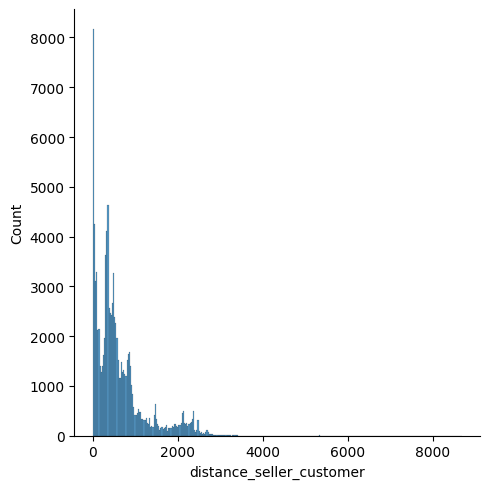

In [25]:
sns.displot(data = matching_geo, x ='distance_seller_customer')

👉 Satıcı-müşteri mesafesinin medyanı ve ortalaması nedir?

In [26]:
matching_geo['distance_seller_customer'].describe()

count    98177.000000
mean       601.685266
std        594.946172
min          0.000000
25%        187.194611
50%        433.792048
75%        798.408741
max       8677.911622
Name: distance_seller_customer, dtype: float64

👀 Yeni DataFrame'inizi kontrol edin ve kod çalıştığında `olist/order.py` içine taşıyın.

In [27]:
Order().get_distance_seller_customer()['distance_seller_customer']

0         301.504681
1         585.563937
2         312.343511
3         293.168420
4         646.163463
            ...     
98661    2754.537709
98662     351.729420
98663     339.056961
98664      72.335998
98665     134.980397
Name: distance_seller_customer, Length: 98666, dtype: float64

🧪 Kodunuzu test edin

In [28]:
from nbresult import ChallengeResult

result = ChallengeResult('distance',
    mean = Order().get_distance_seller_customer()['distance_seller_customer'].mean())
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/mcelik/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/mcelik/code/sprint-15/01-Statistical-Inference/data-orders
configfile: pytest.ini
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 1 item

test_distance.py::TestDistance::test_distance PASSED                     [100%]

============================== 1 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/distance.pickle

git commit -m 'Completed distance step'

git push origin master



Ayrıca `with_distance_seller_customer` `True` olarak ayarlandığında `get_training_data`'yı `get_distance_seller_customer` ile birleştirecek şekilde güncelleyin.

⚠️ `order.py` içindeki değişiklikleri `olist` deposuna commit etmeyi unutmayın!